In [9]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import re
import numpy as np
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] =False
%matplotlib widget

In [10]:
# 只取前面300个点
N = 300
x = np.arange(N)

# rtc的数据
file_path = 'time_drift_rtc.txt'
with open(file_path, 'r') as file:
    data = file.read()
local_times_rtc = []
node1_times_rtc = []
pattern = r'Local time : (\d+)\nNode1 time : (\d+)'
matches = re.findall(pattern, data)
for match in matches:
    local_times_rtc.append(int(match[0]))
    node1_times_rtc.append(int(match[1]))
local_times_rtc = np.array(local_times_rtc)
node1_times_rtc = np.array(node1_times_rtc)+12000000
local_times_rtc = local_times_rtc[0:N]
node1_times_rtc = node1_times_rtc[0:N]

# high-resolution的数据
file_path = 'time_drift_hrt.txt'
with open(file_path, 'r') as file:
    data = file.read()
local_times_hrt = []
node1_times_hrt = []
pattern = r'Local time : (\d+)\nNode1 time : (\d+)'
matches = re.findall(pattern, data)
for match in matches:
    local_times_hrt.append(int(match[0]))
    node1_times_hrt.append(int(match[1]))
local_times_hrt = np.array(local_times_hrt)
node1_times_hrt = np.array(node1_times_hrt)+18000000
local_times_hrt = local_times_hrt[0:N]
node1_times_hrt = node1_times_hrt[0:N]

# 计算时间偏移
delta_rtc = node1_times_rtc - local_times_rtc
delta_hrt = node1_times_hrt - local_times_hrt

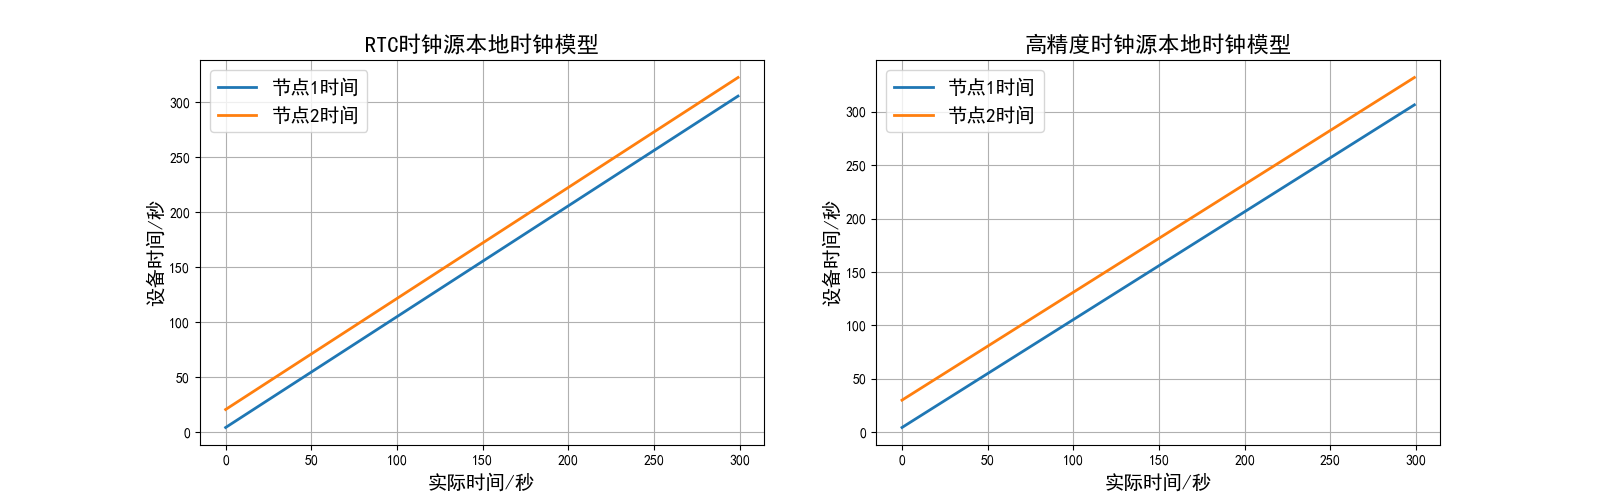

In [11]:
# 时钟模型绘图

# 调整图形大小
plt.figure(figsize=(16, 5))  
# 第一个子图：RTC时钟源设备时钟模型
plt.subplot(121)
plt.plot(x, local_times_rtc/1000000, label='节点1时间', linewidth=2)
plt.plot(x, node1_times_rtc/1000000, label='节点2时间', linewidth=2)
plt.legend(fontsize=14)
plt.title('RTC时钟源本地时钟模型', fontsize=16, fontweight='bold')
plt.xlabel('实际时间/秒', fontsize=14)
plt.ylabel('设备时间/秒', fontsize=14)
plt.grid(True)

# 第二个子图：高精度时钟源设备时钟模型
plt.subplot(122)
plt.plot(x, local_times_hrt/1000000, label='节点1时间', linewidth=2)
plt.plot(x, node1_times_hrt/1000000, label='节点2时间', linewidth=2)
plt.legend(fontsize=14)
plt.title('高精度时钟源本地时钟模型', fontsize=16, fontweight='bold')
plt.xlabel('实际时间/秒', fontsize=14)
plt.ylabel('设备时间/秒', fontsize=14)
plt.grid(True)

# 显示与保存
plt.show()
plt.savefig('time_model.png',dpi=600,bbox_inches='tight')

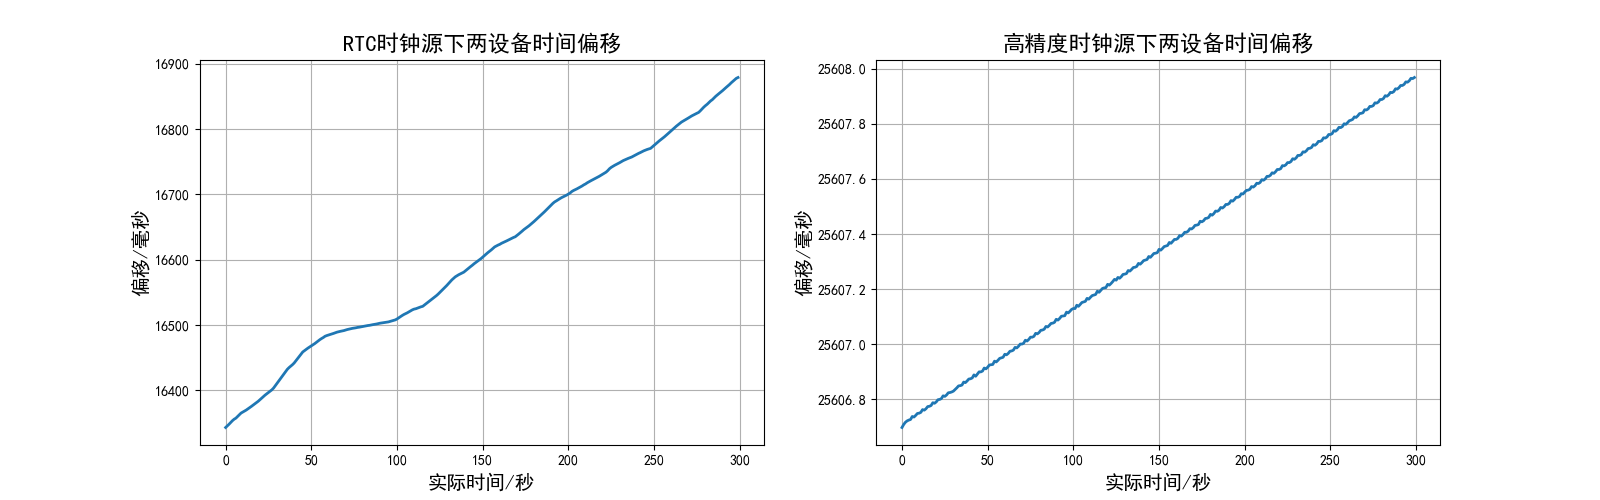

In [12]:
# 时钟偏移绘图
# 调整图形大小
plt.figure(figsize=(16, 5))  

# 第一个子图：RTC时钟源下两设备时间偏移
plt.subplot(121)
plt.plot(x, delta_rtc/1000, linewidth=2)
plt.title('RTC时钟源下两设备时间偏移', fontsize=16, fontweight='bold')
plt.xlabel('实际时间/秒', fontsize=14)
plt.ylabel('偏移/毫秒', fontsize=14)
plt.grid(True)

# 第二个子图：高精度时钟源下两设备时间偏移
plt.subplot(122)
plt.plot(x, delta_hrt/1000, linewidth=2)
plt.title('高精度时钟源下两设备时间偏移', fontsize=16, fontweight='bold')
plt.xlabel('实际时间/秒', fontsize=14)
plt.ylabel('偏移/毫秒', fontsize=14)

# 设置纵坐标不使用偏差法
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.get_major_formatter().set_useOffset(False)
plt.grid(True)

# 显示与保存
plt.show()
plt.savefig('time_drift.png',dpi=600,bbox_inches='tight')
